##### Python for High School (Summer 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_July_22_2022.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_July_22_2022.ipynb)

### XYZ Coordinates

Usually a big part of high school mathematics is becoming familiar with what we call Cartesian Coordinates, named for Rene Descartes, considered one of the great philosophers ("I think therefore I am").  

The idea of using three numbers to determine a fixed point in space, relative to "coordinate axes" is often tackled twice:  first without the vector concept, then with.

In this curriculum, focused as it is on "math objects", it makes sense to just start with [the Vector type](https://en.wikipedia.org/wiki/Euclidean_vector) right from the beginning.

Another feature of this curriculum is the optional use of a raytracer, POV-Ray in particular, to render scenes with geometric content in the foreground, and perhaps a blue sky with clouds in the background.

The raytracer connects us to art history, and the invention of perspective. Depending on the course and teacher experience, a foray into Renaissance master works (often done by a team) is recommended.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52234650345/in/dateposted-public/" title="Perspective Painting"><img src="https://live.staticflickr.com/65535/52234650345_08de99fe53_w.jpg" width="400" height="255" alt="Perspective Painting"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Included in the repo is [pov.py](pov.py), a Python module that writes Scene Description Language in output files, suitable for feeding to POV-Ray.  Pov-Ray is a time-tested cross platform free open source engine, with both command line and GUI front ends.

### XYZ Vectors

![XYZ Vectors](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/3D_Vector.svg/254px-3D_Vector.svg.png)

[Attribution](https://commons.wikimedia.org/wiki/File:3D_Vector.svg)

The mathematical idea of an XYZ Vector is too abstract to include attributes such as color, let alone "thickness".  However on a mathematical canvas, with the physics of light (electromagnetism) involved, color and thickness come into their own.

In an object oriented language such as Python, we have the option to define a Vector type as purely mathematical, with a POV_Vector subclass that's specialized to communicate with POV-Ray, wherein real world "secondary attributes" such as thickness and color make sense to the viewer.

Check [pov.py](pov.py) for the code behind Vector and its child class POV_Vector.  Lots of special names are at work, because it makes mathematical sense to add, subtract, scale (multiply), negate (unary -) these types of object.

In [2]:
from pov import Vector

In [2]:
v0 = Vector(1,0,0)
v1 = Vector(-1,0,0)

In [3]:
v1.angle(v0)

180.0

These two vectors point oppositely to one another, at 180 degrees.  

When we add them, they cancel out to the zero vector.

In [4]:
v0 + v1

Vector(0,0,0)

In [5]:
v3 = Vector(0,1,0)
v1.angle(v3)

90.0

Adding vectors is as simple as adding their respective x, y and z coordinates.  Mentally, slide the 2nd vector to the tip of the first (without rotating) and see where you end up:  that's the vector sum.


![Adding Vectors](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Addition_zweier_Vektoren_im_R%5E2.svg/320px-Addition_zweier_Vektoren_im_R%5E2.svg.png)
[Attribution](https://commons.wikimedia.org/wiki/File:Addition_zweier_Vektoren_im_R%5E2.svg)

![Subtracting Vectors](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Vector%27s_subtraction.svg/291px-Vector%27s_subtraction.svg.png)
[Attribution](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Vector%27s_subtraction.svg/291px-Vector%27s_subtraction.svg.png)

In [10]:
# make these purple for POV-Ray
vA = Vector( 1, 1, 1)
vB = Vector(-1,-1, 1)
vC = Vector(-1, 1,-1)
vD = Vector( 1,-1,-1)

In [4]:
vA.angle(vB)

109.47122063449069

In [6]:
vA.length

1.7320508075688772

In [9]:
pow(3, 1/2)

1.7320508075688772

In [7]:
(vA - vB).length

2.8284271247461903

In [8]:
2 * pow(2, 1/2)

2.8284271247461903

Purple vectors **vA**, **vB**, **vC** and **vD** are to alternating corners of an 8-cubes complex, one cube per XYZ octant.  The six XYZ vectors, positive and negative, are shown in gray with orange nibs.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52234560299/in/dateposted-public/" title="Alternating Octants"><img src="https://live.staticflickr.com/65535/52234560299_7d31f6d501_o.jpg" width="415" height="381" alt="Alternating Octants"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

### Polyhedrons:  Vector Vertexes + Faces

In the last chapter we talked a lot about Graphs in the sense of Networks, and how Polyhedrons count as Graphs.

Just an Adjacency Matrix will not give us enough information however.  We would like to be able to be able to pinpoint all the vertexes (nodes) using XYZ coordinates.

Then we can connect those vertexes with an Adjacency Matrix.  

Lets assume these six arrows (vectors) are labeled **i**, **j**, **k**, **l**, **m**, **n** (six in all).

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52229886848" title="Base XYZ"><img src="https://live.staticflickr.com/65535/52229886848_e96694dc52_o.jpg" width="500" height="460" alt="Base XYZ"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Now connect pairs of vector tips to form an octahedron.  

Tips do not connect if directly across from one another, in a north-south pole relationship.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52228875047/in/photostream/" title="Octahedron Around Base XYZ"><img src="https://live.staticflickr.com/65535/52228875047_2b13136dc5_o.jpg" width="500" height="460" alt="Octahedron Around Base XYZ"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

That all seems like a pretty good design, but then there's still some valuable information we could lose here.  

What vertexes are part of the same face?  The Adjacency Matrix does not make that easy to determine.

If we group vertexes into faces, we will get all the adjacency information we need.

**i**, **j**, **k**, **l**, **m** and **n** are the six pointers to the six vertexes.  We see them organized into eight triangles (the octahedron's faces).  

We also see a call to `self._distill()`, a function that gets all the edges from the faces, in terms of vector tip to vector tip segments. 

For example, from face `('j', 'k', 'l')` we may derive `Edge('j', 'k')`, `Edge('k','l')` and `Edge('j','l')` -- the three edges of that triangle.

```python

class Octahedron (Polyhedron):
    """
    Octahedron
    """

    def __init__(self, verts):

        self.vertexes = verts
        self.faces = (('j','k','i'),('j','i','l'),
                      ('j','l','n'),('j','n','k'),               
                      ('m','k','i'),('m','i','l'),
                      ('m','l','n'),('m','n','k'))

        self.edges = self._distill()  # in the Polyhedron superclass (parent class)
        # POV-Ray
        self.edge_color = "rgb <1, 0, 0>"
        self.edge_radius= 0.03
        self.vert_color = "rgb <1, 0, 0>"
        self.vert_radius= 0.03
```

In [6]:
from pov import Octahedron, POV_Vector

A POV_Vector is an ordinary vector with some added ability to write about itself in Scene Description Language, the language of POV-Ray.

Ditto the POV_Edge:  it mainly contains the two POV_Vectors that define it, but it also has color and thickness information, controlling how it looks if/when we include it as a part of a rendered scene.  We may optionally include pointy arrow tips.

As the code below makes fairly clear, all vectors **a** - **z** depend on the initial four vectors **a**, **b**, **c** and **d**.  These are to the four corners of a regular tetrahedron, from its center.  Every other vector ends up a vector sum of those, as the additions show.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52191414643/in/dateposted-public/" title="render_me"><img src="https://live.staticflickr.com/65535/52191414643_5cec219945_o.jpg" width="280" height="280" alt="render_me"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [7]:
# four spokes to the corners of a regular tetrahedron from (0,0,0)

a = POV_Vector(x =  0.35355339059327373, 
               y =  0.35355339059327373, 
               z =  0.35355339059327373)

b = POV_Vector(x = -0.35355339059327373, 
               y = -0.35355339059327373, 
               z =  0.35355339059327373)

c = POV_Vector(x = -0.35355339059327373, 
               y =  0.35355339059327373, 
               z = -0.35355339059327373)

d = POV_Vector(x =  0.35355339059327373, 
               y = -0.35355339059327373, 
               z = -0.35355339059327373)

# the rest of the vectors a-z, for 26 points:

e,f,g,h     = b+c+d, a+c+d, a+b+d, a+b+c 
i,j,k,l,m,n = a+b, a+c, a+d, b+c, b+d, c+d
o,p,q,r,s,t = i+j, i+k, i+l, i+m, n+j, n+k
u,v,w,x,y,z = n+l, n+m, j+l, l+m, m+k, k+j

octa_dict = {'i':i, 'j':j, 'k':k, 'l':l, 'm':m, 'n':n}

oc = Octahedron(octa_dict)
oc

Every pair of the four purple vectors, **a**, **b**, **c**, **d**, sums to one of six orange vectors.  

The orange vectors, **i**, **j**, **k**, **l**, **m** and **n**, are either mutually perpendicular, at 90 degrees, or at 180 degrees.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52230320049" title="Vector Sums"><img src="https://live.staticflickr.com/65535/52230320049_141ca70154_o.jpg" width="490" height="445" alt="Vector Sums"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [8]:
a.angle(b)

109.47122063449069

In [9]:
i.angle(j)

90.0

Lets dump out all the information in an Octahedron, now that we have one.

In [10]:
oc.edges  # vector pairs, edges go tip to tip

[POV_Edge(POV_Vector(0.0,0.0,0.7071067811865475), POV_Vector(-0.7071067811865475,0.0,0.0)),
 POV_Edge(POV_Vector(0.0,0.0,0.7071067811865475), POV_Vector(0.0,0.7071067811865475,0.0)),
 POV_Edge(POV_Vector(0.0,0.7071067811865475,0.0), POV_Vector(-0.7071067811865475,0.0,0.0)),
 POV_Edge(POV_Vector(0.0,0.7071067811865475,0.0), POV_Vector(0.0,0.0,-0.7071067811865475)),
 POV_Edge(POV_Vector(0.7071067811865475,0.0,0.0), POV_Vector(0.0,0.0,-0.7071067811865475)),
 POV_Edge(POV_Vector(0.0,0.0,0.7071067811865475), POV_Vector(0.0,-0.7071067811865475,0.0)),
 POV_Edge(POV_Vector(-0.7071067811865475,0.0,0.0), POV_Vector(0.0,0.0,-0.7071067811865475)),
 POV_Edge(POV_Vector(0.7071067811865475,0.0,0.0), POV_Vector(0.0,-0.7071067811865475,0.0)),
 POV_Edge(POV_Vector(0.0,-0.7071067811865475,0.0), POV_Vector(0.0,0.0,-0.7071067811865475)),
 POV_Edge(POV_Vector(0.0,0.0,0.7071067811865475), POV_Vector(0.7071067811865475,0.0,0.0)),
 POV_Edge(POV_Vector(-0.7071067811865475,0.0,0.0), POV_Vector(0.0,-0.70710678118

In [11]:
oc.vertexes  # vectors, tail at (0,0,0)

{'i': POV_Vector(0.0,0.0,0.7071067811865475),
 'j': POV_Vector(0.0,0.7071067811865475,0.0),
 'k': POV_Vector(0.7071067811865475,0.0,0.0),
 'l': POV_Vector(-0.7071067811865475,0.0,0.0),
 'm': POV_Vector(0.0,-0.7071067811865475,0.0),
 'n': POV_Vector(0.0,0.0,-0.7071067811865475)}

In [12]:
oc.faces  # using the assigned labels, a-z as necessary

(('j', 'k', 'i'),
 ('j', 'i', 'l'),
 ('j', 'l', 'n'),
 ('j', 'n', 'k'),
 ('m', 'k', 'i'),
 ('m', 'i', 'l'),
 ('m', 'l', 'n'),
 ('m', 'n', 'k'))

What's the precise distance from **j** to **k**, tip to tip?  

Vectors make that easy to compute, as the length of their difference.

In [13]:
(oc.vertexes['j'] - oc.vertexes['k']).length

0.9999999999999999

... or 1, in other words (floating point numbers come with rounding errors).  The octahedron has edges 1, thanks to initially chosen **i**, **j**, **k**, **l**, **m** and **n**.

### A Segue to Trig


A big part of high school mathematics is figuring out information about a triangle, given some starting information and a few rules (or laws).  The laws of deduction drive our "omni-triangulating" detective work.

Given any two vectors with a common origin (which is what our Vectors tend to have, absent any translation method to move them around), it makes sense to wonder about the measure of the angle between them.  

If these two vectors are pegged to specific points in XYZ space, that angle should be both definite and computable, and it is, with trigonometry.

For example, if you have Vector A from (0,0,0) to (1,1,1) and Vector B from (0,0,0) to (1,0,0), what is the angle between them?  

![magic angle](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Magic_angle.svg/320px-Magic_angle.svg.png)
[Attribution](https://commons.wikimedia.org/wiki/File:Magic_angle.svg)

In [19]:
import math

In [14]:
vA = Vector(1,1,1)
vB = Vector(1,0,0)
vA.angle(vB)

54.735610317245346

Vector A may be envisioned as the body diagonal of a cube, versus Vector B which is along an edge.  The angle between them is known as [the "magic angle"](https://en.wikipedia.org/wiki/Magic_angle) in some circles.  

It's also half the angle between any two vectors from the center of a tetrahedron to two corners.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52191414643/in/dateposted-public/" title="render_me"><img src="https://live.staticflickr.com/65535/52191414643_5cec219945_o.jpg" width="280" height="280" alt="render_me"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [15]:
a = Vector(x =  0.35355339059327373, 
           y =  0.35355339059327373, 
           z =  0.35355339059327373)

b = Vector(x = -0.35355339059327373, 
           y = -0.35355339059327373, 
           z =  0.35355339059327373)

In [16]:
a.angle(b)

109.47122063449069

In [17]:
a.angle(b)/2

54.735610317245346

The sine of angle theta in a right triangle is the ratio of two lengths:

side opposite theta / hypotenuse.

The cosine of theta in a right triangle is the ratio of: 

side defining theta (adjacent) / hypotenuse.

If you already know opposite / hypotenuse and want to find theta, use the inverse function arcsin (asin in Python's math module).

If you have adjacent / hypotenuse handy, use arccos (acos in Python's math module) to get theta. 

![magic angle](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Magic_angle.svg/320px-Magic_angle.svg.png)
[Attribution](https://commons.wikimedia.org/wiki/File:Magic_angle.svg)

In [20]:
math.degrees(math.asin(math.sqrt(2)/math.sqrt(3)))

54.73561031724536

In [21]:
math.degrees(math.acos(1/math.sqrt(3)))

54.735610317245346

### Segue to Complex Numbers

Complex numbers may be represented on what many call an Argand Plane (because Argand popularized its usage).  Clearly we have an (i, j) Vector of some kind.  Trigonometry will enter into it.

![Argand Diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/A_plus_bi.svg/320px-A_plus_bi.svg.png)

In [22]:
import cmath, math

[Python cmath.polar at W3](https://www.w3schools.com/python/ref_cmath_polar.asp)

In [23]:
c = complex(2,2)
r, theta = cmath.polar(c)
r, theta

(2.8284271247461903, 0.7853981633974483)

In [24]:
math.degrees(theta)

45.0

### YouTube Gallery

In [1]:
from IPython.display import YouTubeVideo

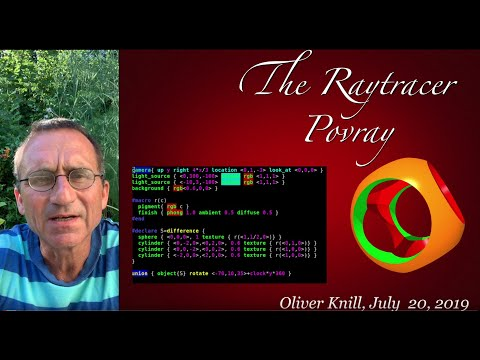

In [3]:
YouTubeVideo("ZJo_P9mHFd8") # a veteran user shows us around

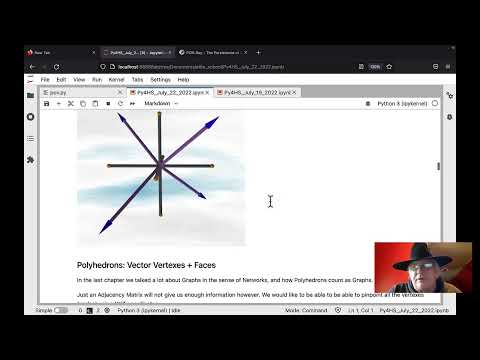

In [2]:
YouTubeVideo("xaXXIpXx-lU")  # about this Notebook